# Clustering completo con Python

Para implementar el clustering en python usaremos el dataset de vinos blancos y rojos. 

Tendremos que tener en cuenta el conocimiento técnico que implica la temática. Tomaremos en consideración todas las variables relacionadas con las características químicas, aunque tomará especial relevancia la opinión del somellier (variable `quality`).

El objetivo es determinar unos clusters que engloben vinos con características similares para los cuales determinar un precio en función a dicha clasificación.

In [17]:
import pandas as pd
df = pd.read_csv("../../../../GitHub/python-ml-course/datasets/wine/winequality-red.csv", sep = ";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
df.shape

(1599, 12)

Ahora pintamos un histograma de la variable `quality`.

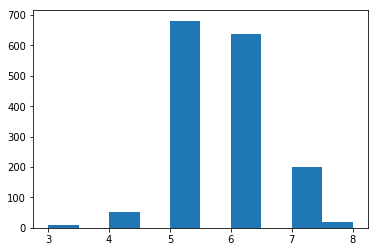

In [19]:
import matplotlib.pyplot as plt
plt.hist(df['quality'])
plt.show()

Una operación interesante será observar los promedios de las características de los vinos según su calidad.

In [20]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


Y de aquí tomar algunas observaciones:
* La volatilidad del ácido parece que puntúa negativamente a medida que aumenta
* El ácido cítrico puntúa positivamente
* A mayor nivel de cloro, peor el vino
* Los sulfatos influyen positivamente
* El resto de características son neutras, homogéneas o no presentan patrones.

### Normalización de los datos

Para hacer un clústering de manera correcta, tendremos que normalizar los valores de todas las columnas para igualar los rangos y que todas las variables pesen lo mismo al ejecutar el algoritmo.

In [21]:
df_norm = (df-df.min()) / (df.max() - df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Clustering jerárquico con scikit-learn

Este método se puede aplicar con el paquete `AgglomerativeClustering` de `sklearn.cluster`.

Tomaremos como número de clusters las distintas calidades de los vinos. Por tanto, $k=6$.

In [22]:
from sklearn.cluster import AgglomerativeClustering

In [23]:
clus = AgglomerativeClustering(n_clusters = 6, linkage='ward').fit(df_norm)

Ahora crearemos un objeto de tipo `Series` con las etiquetas obtenidas del clustering.

In [24]:
md_h = pd.Series(clus.labels_)
md_h.head()

0    2
1    2
2    2
3    3
4    2
dtype: int64

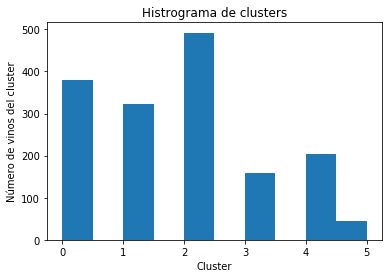

In [9]:
plt.hist(md_h)
plt.title("Histrograma de clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")
plt.show()

* Parece que hay más vinos malos de los que en un principio detectaba la opinión del somelier.
* Las observaciones parecen más uniformes

Podemos buscar cada uno de los hijos para cada nodo oja de la siguiente manera.

In [10]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]])

Y dibujarlo en un dendograma.

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [12]:
Z = linkage(df_norm, 'ward')

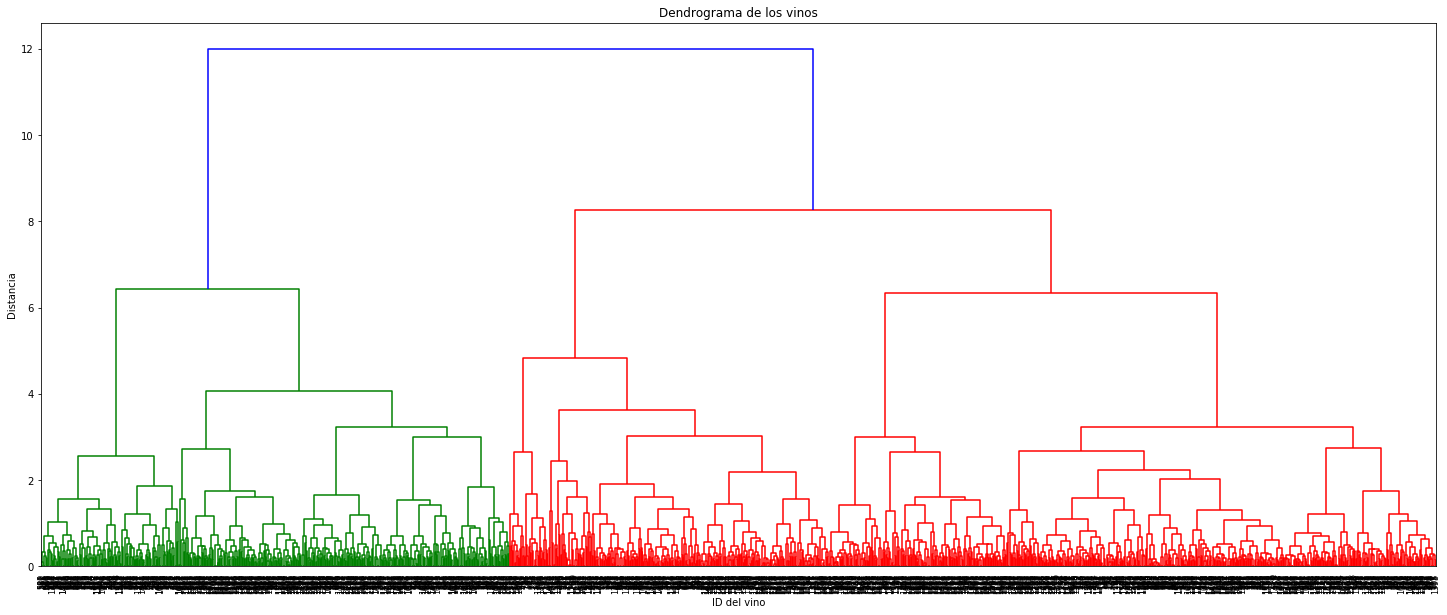

In [13]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

## Clustering k-means con Scikit-Learn

In [14]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [15]:
model = KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
model.labels_

array([4, 4, 4, ..., 0, 0, 5], dtype=int32)

In [25]:
md_k = pd.Series(model.labels_)

In [26]:
df_norm['clust_h'] = md_h
df_norm['clust_k'] = md_k

In [27]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,4


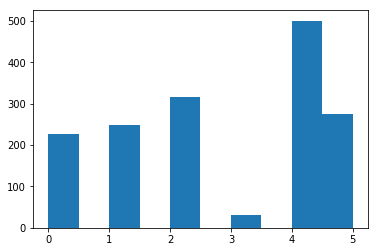

In [28]:
plt.hist(md_k)
plt.show()

Vemos que los resultados son similares pero con algunas diferencias claras:

* Similitudes
    * Hay un cluster que domina
    * Hay un cluster que a penas tiene hijos
    * El resto de clusters son homogéneos
* Diferencias
    * La forma de ordenar y clasificar los datos cambia
    
También podemos obtener las coordenadas de los centroides del modelo.

In [29]:
model.cluster_centers_

array([[0.17539978, 0.32438116, 0.08798246, 0.09354722, 0.09600064,
        0.24993823, 0.12286901, 0.32474496, 0.57804945, 0.18426305,
        0.48747188, 0.60964912],
       [0.58242935, 0.20579706, 0.51197581, 0.13400354, 0.13117965,
        0.13908451, 0.09183005, 0.65596431, 0.33194691, 0.22249855,
        0.29185277, 0.54758065],
       [0.31671366, 0.27789421, 0.30416404, 0.15198133, 0.12695186,
        0.38021504, 0.29781186, 0.5391195 , 0.43592737, 0.17871512,
        0.21415514, 0.45488959],
       [0.33716814, 0.29223744, 0.48133333, 0.07557078, 0.53789649,
        0.20938967, 0.21071849, 0.5143906 , 0.2335958 , 0.59001996,
        0.16512821, 0.46666667],
       [0.26345539, 0.36045717, 0.12035928, 0.09135838, 0.12274949,
        0.14521661, 0.10810887, 0.49209071, 0.48712025, 0.15541372,
        0.21888019, 0.43912176],
       [0.36148029, 0.16073474, 0.41854545, 0.10438356, 0.10601912,
        0.15984635, 0.08353357, 0.41547991, 0.42073014, 0.23560152,
        0.47865734,

El **coeficiente de inercia** del modelo representa la suma de los errores cuadrados internos (no normalizado) de la que hablamos antes y que será necesaria para el método del codo.

In [30]:
model.inertia_

186.5440508800774

### Interpretación final

In [42]:
df_norm.drop(columns='clust_h').groupby('clust_k').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
clust_k,,,,,,,,,,,,
0,0.175400,0.324381,0.087982,0.093547,0.096001,0.249938,0.122869,0.324745,0.578049,0.184263,0.487472,0.609649
1,0.582429,0.205797,0.511976,0.134004,0.131180,0.139085,0.091830,0.655964,0.331947,0.222499,0.291853,0.547581
2,0.316714,0.277894,0.304164,0.151981,0.126952,0.380215,0.297812,0.539119,0.435927,0.178715,0.214155,0.454890
3,0.337168,0.292237,0.481333,0.075571,0.537896,0.209390,0.210718,0.514391,0.233596,0.590020,0.165128,0.466667
4,0.263455,0.360457,0.120359,0.091358,0.122749,0.145217,0.108109,0.492091,0.487120,0.155414,0.218880,0.439122
5,0.361480,0.160735,0.418545,0.104384,0.106019,0.159846,0.083534,0.415480,0.420730,0.235602,0.478657,0.690909


Comprobaremos que los grupos cumplen con las características observadas para los grupos antes del clustering.

* La volatilidad del ácido parece que puntúa negativamente a medida que aumenta
* El ácido cítrico puntúa positivamente
* A mayor nivel de cloro, peor el vino
* Los sulfatos influyen positivamente
* El resto de características son neutras, homogéneas o no presentan patrones.
